<a href="https://colab.research.google.com/github/kanvesh/DataMining/blob/master/image_similarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
import cv2 
from PIL import Image as PILImage
from IPython.display import Image
import urllib.request
from keras.models import Model
from scipy.spatial.distance import cosine
from keras.applications.vgg16 import VGG16

Using TensorFlow backend.


In [5]:
base_model = ResNet50(weights='imagenet')
base_model.summary()


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [0]:
model_2048 = Model(inputs=base_model.input, outputs=base_model.get_layer('avg_pool').output)

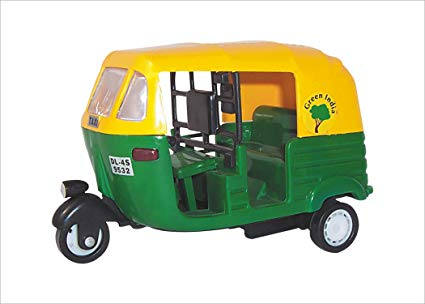

In [6]:
img_path = 'https://images-na.ssl-images-amazon.com/images/I/71s7Ug%2BO6qL._SX425_.jpg'
urllib.request.urlretrieve(img_path,'temp.jpg')
Image('temp.jpg')

In [0]:
def get_vector(image_url, model):
  urllib.request.urlretrieve(image_url,'temp_func.jpg')
  img = image.load_img('temp_func.jpg', target_size=(224, 224))
  display(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)

  features = model.predict(x)
  
  return features[0]

In [0]:
def get_vector_local(image_filepath, model):
  img = image.load_img(image_filepath, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)

  features = model.predict(x)
  
  return features[0]

In [0]:
def cosine_similarity(a,b):
  cosine_distance = 1-cosine(a,b)
  return "{:.1%}".format(cosine_distance)

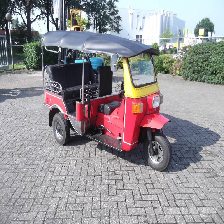

In [34]:
image_url = 'https://st.mascus.com/imagetilewm/product/f76b9d44/other-tuk-tuk-lk-10,6c5f91b1.jpg'
a = get_vector(image_url, model_2048)

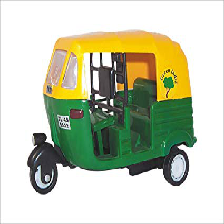

In [35]:
image_url = 'https://images-na.ssl-images-amazon.com/images/I/71s7Ug%2BO6qL._SX425_.jpg'
b = get_vector(image_url, model_2048)

In [36]:
%%timeit
cosine_similarity(a,b)

The slowest run took 13.00 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 49.4 µs per loop


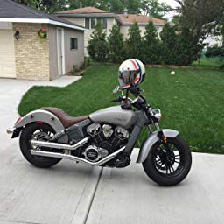

In [13]:
image_url = 'https://images-na.ssl-images-amazon.com/images/I/812+zMDwznL._CR204,0,1224,1224_UX256.jpg'
c = get_vector(image_url, model_2048)

In [29]:
cosine_similarity(a,b)

'58.6%'

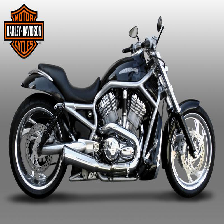

In [30]:
image_url = 'https://i.kinja-img.com/gawker-media/image/upload/s--KdZ9JgQO--/c_scale,f_auto,fl_progressive,q_80,w_800/eqesmoipnh3trliwwaef.jpg'
d = get_vector(image_url, model_2048)

In [31]:
cosine_similarity(c,d)

'67.1%'

In [0]:
!mkdir paris

In [0]:
import numpy as np

In [0]:
a= np.random.rand(1000)
b= np.random.rand(1000)

In [49]:
%%timeit
cosine_similarity(np.random.rand(1000),np.random.rand(1000))

The slowest run took 9.08 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 62.5 µs per loop


In [51]:
base_vgg = VGG16(weights='imagenet')

553467904/553467096 [==============================] - 7s 0us/step


In [52]:
base_vgg.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [0]:

vgg_4096 = Model(inputs=base_vgg.input, outputs=base_vgg.get_layer('fc2').output)
vgg_25088 = Model(inputs=base_vgg.input, outputs=base_vgg.get_layer('flatten').output)



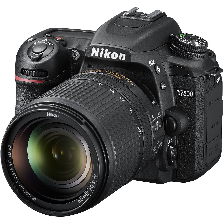

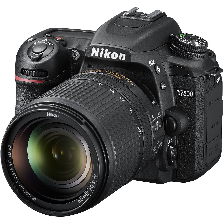

In [91]:
image_url = 'https://www.bhphotovideo.com/images/images2000x2000/nikon_d7500_dslr_camera_with_1333200.jpg'
a= get_vector(image_url,vgg_4096)
a1 = get_vector(image_url,vgg_25088)


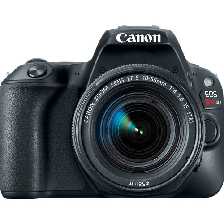

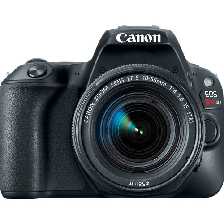

In [92]:
image_url = 'https://natcam-production.s3.amazonaws.com/product-103090806-images/103090806_1.jpg'
b= (get_vector(image_url,vgg_4096))
b1 = get_vector(image_url,vgg_25088)


In [82]:
cosine_similarity(a1,b1)

'35.8%'

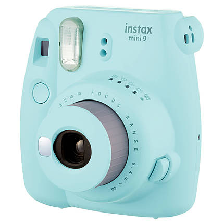

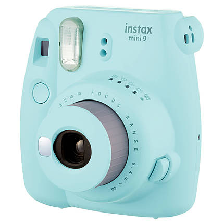

In [83]:
image_url = 'https://www.fotoaparatas.lt/images/eshop/09211112433.jpeg'
c= (get_vector(image_url,vgg_4096))
c1 = get_vector(image_url,vgg_25088)

In [88]:
print(cosine_similarity(a,c))
print(cosine_similarity(a1,c1))

32.5%
33.3%


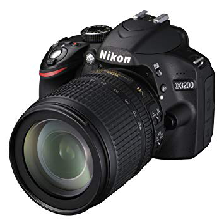

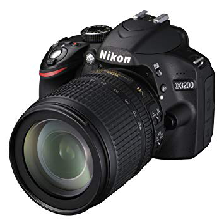

In [89]:
image_url = 'https://images-na.ssl-images-amazon.com/images/I/91qomZQwY4L._SX355_.jpg'
d= (get_vector(image_url,vgg_4096))
d1 = get_vector(image_url,vgg_25088)

In [90]:
print(cosine_similarity(a,d))
print(cosine_similarity(a1,d1))

89.7%
76.4%


In [93]:
print(cosine_similarity(a,b))
print(cosine_similarity(a1,b1))

84.3%
35.8%


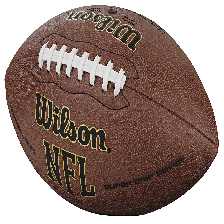

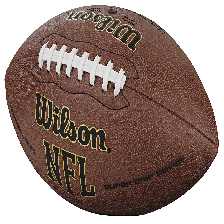

In [98]:
image_url = 'https://images-na.ssl-images-amazon.com/images/I/91Wzqo-BRSL._SL1500_.jpg'
e= (get_vector(image_url,vgg_4096))
e1 = get_vector(image_url,vgg_25088)


In [100]:
print(cosine_similarity(a,e))
print(cosine_similarity(a1,e1))


21.6%
14.5%


In [2]:
!pip install annoy

    100% |████████████████████████████████| 645kB 7.9MB/s 
  Running setup.py bdist_wheel for annoy ... - \ | done
  Stored in directory: /root/.cache/pip/wheels/b6/99/e3/4174adc6afbe8b877503e85760a916a41252f5e824b3f344e7
Successfully built annoy


In [0]:
resnet = model_2048

In [11]:
!ls

sample_data  yelp_sample  yelp_sample.zip


In [0]:
!unzip yelp_sample.zip

In [17]:
%%timeit
get_vector_local('yelp_sample/131270.jpg',resnet)

1 loop, best of 3: 268 ms per loop
